In [7]:
import pandas as pd

## This is apple data  from Jan. 1 2023 until December 31st 2023.

In [11]:
df = pd.read_csv('APP.csv')

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,10.81,11.140,10.470,10.73,10.73,2575200
1,2023-01-04,10.98,11.180,10.570,10.90,10.90,3561300
2,2023-01-05,9.71,10.010,9.435,9.85,9.85,4030100
3,2023-01-06,9.89,9.935,9.215,9.72,9.72,4199800
4,2023-01-09,9.95,10.530,9.920,10.18,10.18,3275600


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       331 non-null    object 
 1   Open       331 non-null    float64
 2   High       331 non-null    float64
 3   Low        331 non-null    float64
 4   Close      331 non-null    float64
 5   Adj Close  331 non-null    float64
 6   Volume     331 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 18.2+ KB


In [15]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

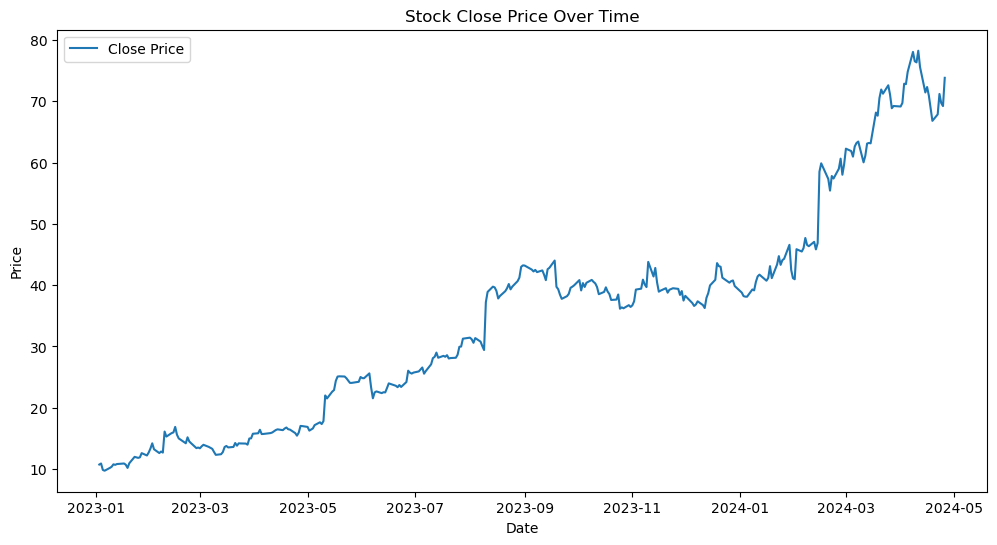

In [19]:
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
# Calculate daily price change
df['Price Change'] = df['Close'].diff()

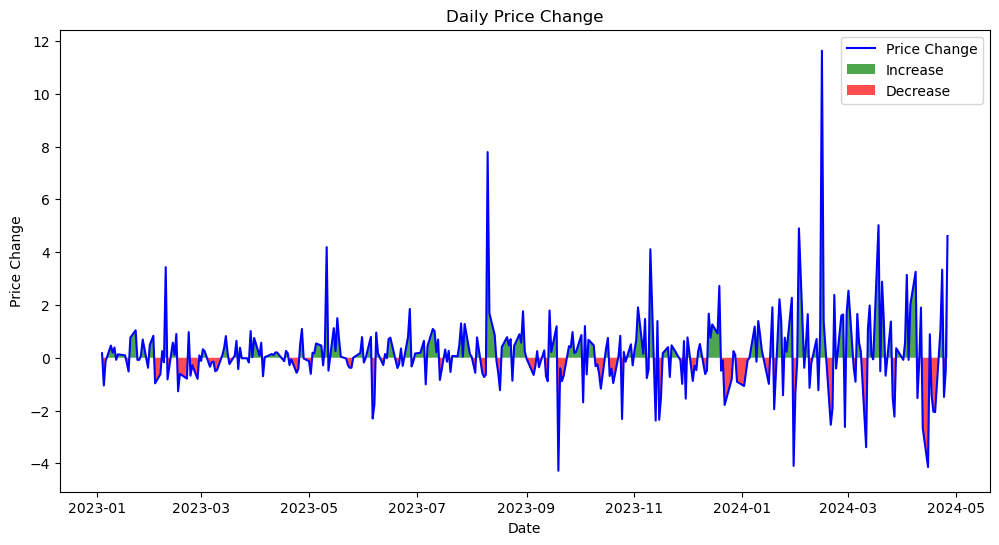

In [21]:
# Visualization of price increases and decreases
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price Change'], label='Price Change', color='b')
plt.fill_between(df['Date'], df['Price Change'], 0, where=(df['Price Change'] > 0), facecolor='green', interpolate=True, alpha=0.7, label='Increase')
plt.fill_between(df['Date'], df['Price Change'], 0, where=(df['Price Change'] < 0), facecolor='red', interpolate=True, alpha=0.7, label='Decrease')
plt.title('Daily Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.show()

# Here we divide stocks into groups

In [24]:
import pandas as pd


# Calculate the daily returns of the S&P 500 index
df['SP500 Return'] = df['Close'].pct_change()

# Calculate the average daily return of the S&P 500 index
avg_sp500_return = df['SP500 Return'].mean()

# Print the average daily return of the S&P 500 index
print("Average daily return of the S&P 500 index:", avg_sp500_return)


Average daily return of the S&P 500 index: 0.0066839641395051415


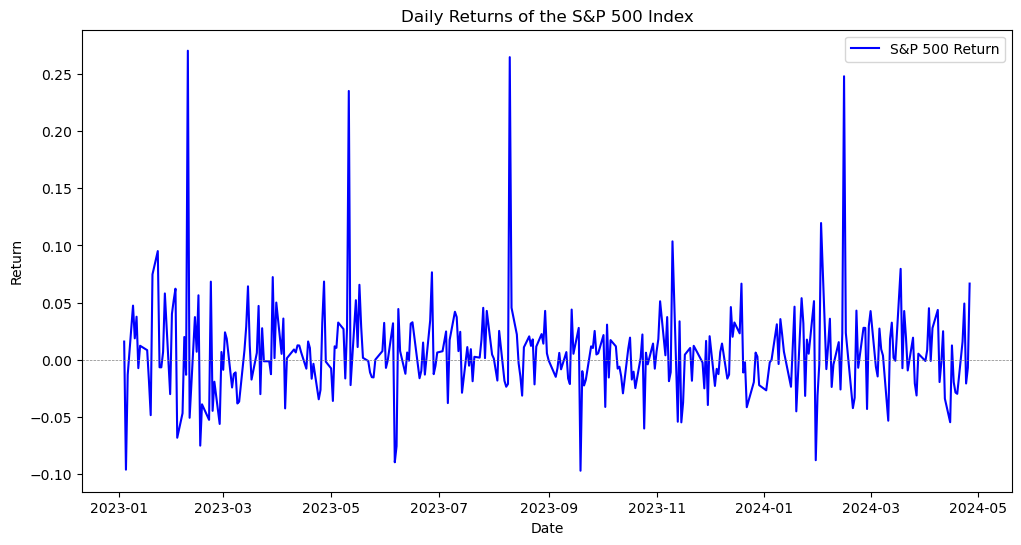

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SP500 Return'], label='S&P 500 Return', color='b')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
plt.title('Daily Returns of the S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

In [33]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Stock Return,SP500 Return
0,2023-01-03,10.81,11.140,10.470,10.73,10.73,2575200,NaN,NaN,NaN
1,2023-01-04,10.98,11.180,10.570,10.90,10.90,3561300,0.17,0.015843,0.015843
2,2023-01-05,9.71,10.010,9.435,9.85,9.85,4030100,-1.05,-0.096330,-0.096330
3,2023-01-06,9.89,9.935,9.215,9.72,9.72,4199800,-0.13,-0.013198,-0.013198
4,2023-01-09,9.95,10.530,9.920,10.18,10.18,3275600,0.46,0.047325,0.047325


# Decision Tree Classifier

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [34]:
# Define features and target variable
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close']]
y = df['Volume']


In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Create and train a decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
# Evaluate model using confusion matrix
dt_predictions = dt_model.predict(X_test)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

In [43]:
# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': dt_predictions})
print(results)


      Actual  Predicted
25   7109300    3526800
307  2618000    2812100
73   2262600    2246900
219  5182300    2617200
57   2424000    3350600
..       ...        ...
315  4150800    4692300
3    4199800    4030100
77   1740900    5111600
238  3158300    3996700
60   2675900    2701100

[67 rows x 2 columns]


In [42]:
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [59]:
#!pip install --upgrade scikit-learn


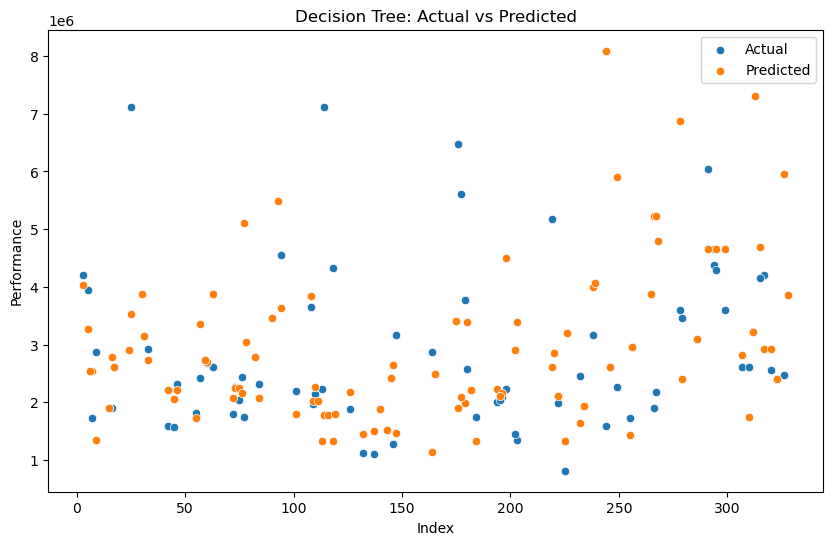

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot Decision Tree output
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=y_test, label='Actual')
sns.scatterplot(x=y_test.index, y=dt_predictions, label='Predicted')
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Performance')
plt.legend()
plt.show()

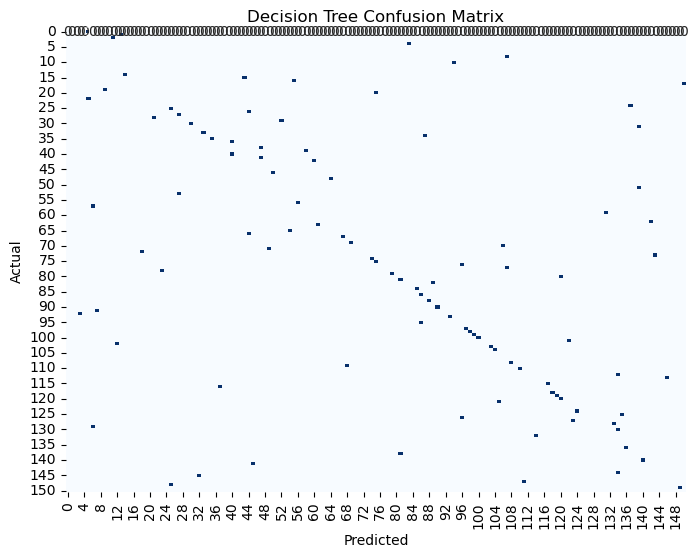

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dt_predictions = dt_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, dt_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


# Random forest

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [45]:
# Define features and target variable
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close']]
y = df['Volume']

In [46]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# Create and train a random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Evaluate model using confusion matrix
rf_predictions = rf_model.predict(X_test)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

In [49]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})
print(results)

      Actual  Predicted
25   7109300    3526800
307  2618000    2812100
73   2262600    2243200
219  5182300    3160600
57   2424000    1728300
..       ...        ...
15   1904200    2707800
6    2544500    1345500
286  3099000    6228000
93   5482300    1749000
30   3881500    2246900

[100 rows x 2 columns]


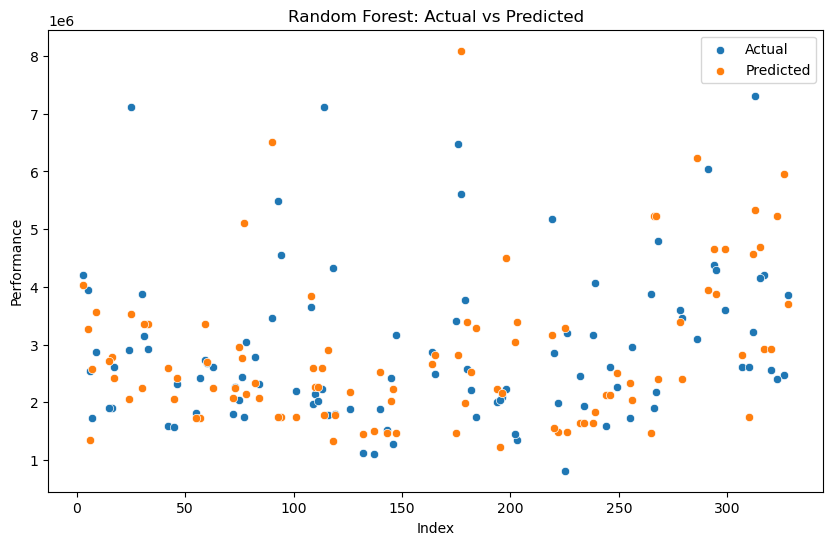

In [60]:
# Plot Random Forest output
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=y_test, label='Actual')
sns.scatterplot(x=y_test.index, y=rf_predictions, label='Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [50]:
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)

Random Forest Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


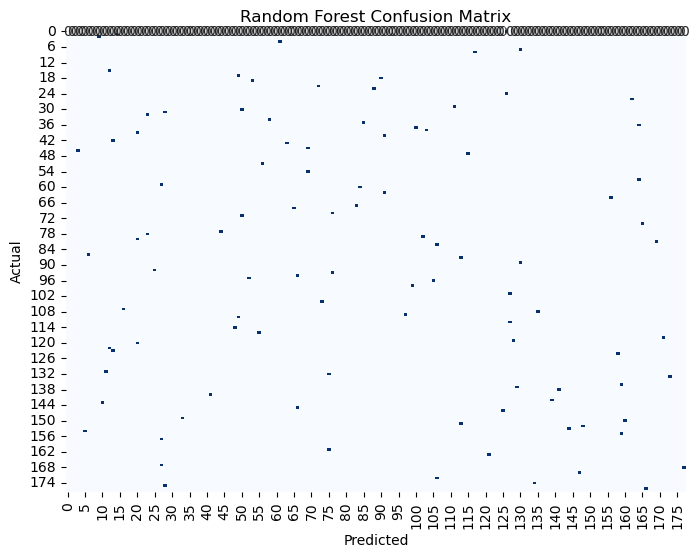

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()
